# Recommedation System: 

Another common data problem is producing recommendations of some sort. Netflix
recommends movies you might want to watch. Amazon recommends products you might
want to buy. Twitter recommends users you might want to follow.

# Types of Recommender System:
 ## Content Based:

Content-based filtering uses item features to recommend other items similar to what the user likes, based on their previous actions or explicit feedback.

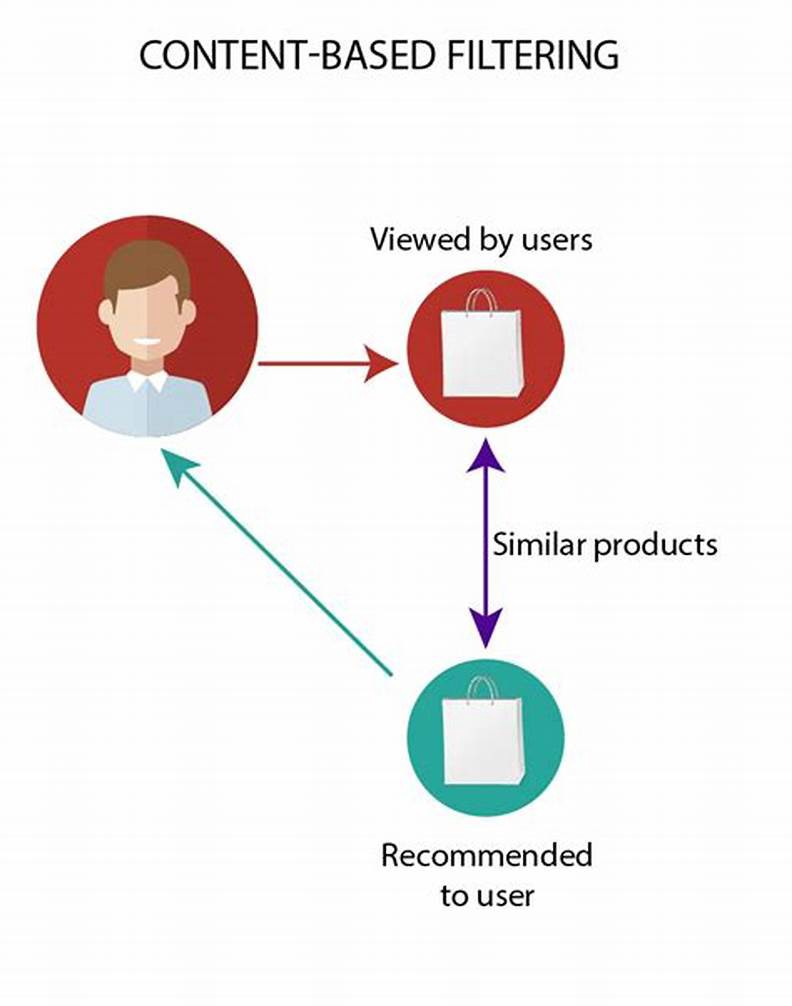

## Collaborative Based:

Collaborative filtering uses similarities between users and items simultaneously to provide recommendations. This allows for serendipitous recommendations; that is, collaborative filtering models can recommend an item to user A based on the interests of a similar user B.

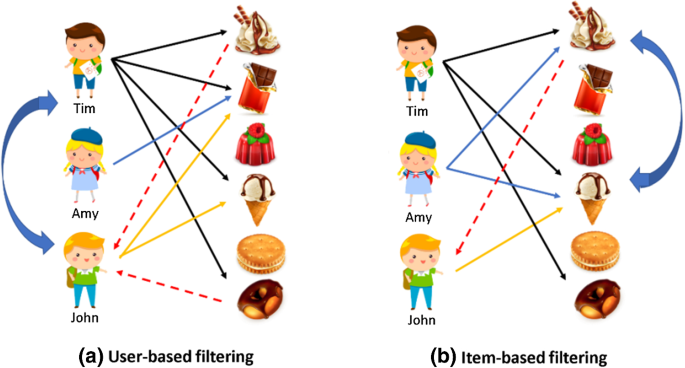


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity


In [20]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [43]:
movie_reviews = pd.read_csv('/content/movie_overviews.csv')

In [44]:
movie_reviews.head()

,id,title,overview,tagline
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",NaN
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...


In [45]:
movie_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9099 entries, 0 to 9098
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        9099 non-null   int64 
 1   title     9099 non-null   object
 2   overview  9087 non-null   object
 3   tagline   7033 non-null   object
dtypes: int64(1), object(3)
memory usage: 284.5+ KB


In [46]:
movie_reviews.isnull().sum()

id             0
title          0
overview      12
tagline     2066
dtype: int64

In [48]:
movie_reviews = movie_reviews.drop(['id','tagline'], axis=1)
movie_reviews = movie_reviews.dropna()

In [49]:
movie_reviews.isnull().sum()

title       0
overview    0
dtype: int64

In [50]:
# Preprocess

def clean_text(sent):
  stop_words = set(stopwords.words('english'))

  words = word_tokenize(sent)
  words = [word for word in words if word.isalpha()]
  words = [word.lower() for word in words if word.lower() not in stop_words]

  return ' '.join(words)

In [51]:
clean_text(movie_reviews['overview'][0])

'led woody andy toys live happily room andy birthday brings buzz lightyear onto scene afraid losing place andy heart woody plots buzz circumstances separate buzz woody owner duo eventually learns put aside differences'

In [52]:
movie_reviews['overview'] = movie_reviews['overview'].apply(clean_text)

In [53]:
movie_reviews.head()

,title,overview
0,Toy Story,led woody andy toys live happily room andy bir...
1,Jumanji,siblings judy peter discover enchanted board g...
2,Grumpier Old Men,family wedding reignites ancient feud neighbor...
3,Waiting to Exhale,cheated mistreated stepped women holding breat...
4,Father of the Bride Part II,george banks recovered daughter wedding receiv...


In [54]:
plots = movie_reviews['overview']

# Feature Extraction

In [55]:
# Create TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Generate matrix of tf-idf vectors
tfidf_matrix = vectorizer.fit_transform(plots)

# Consine Similarity:

Cosine similarity measures the similarity between two vectors of an inner product space. It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in roughly the same direction.

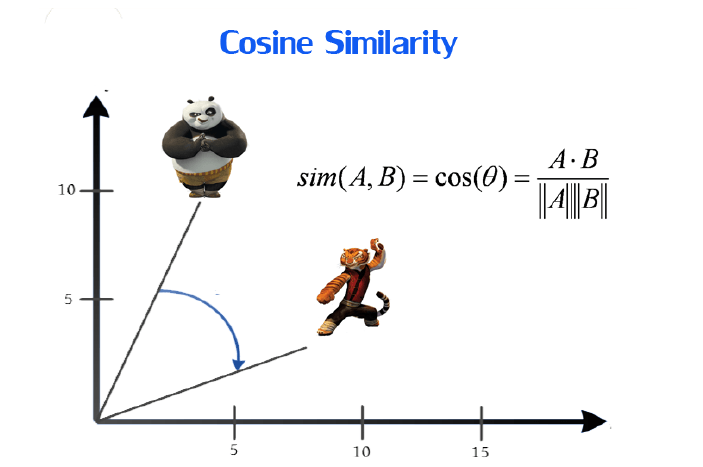

In [56]:
cosine_sim_mat = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [57]:
cosine_sim_mat

array([[1.        , 0.01816782, 0.        , ..., 0.        , 0.        ,
        0.01183123],
       [0.01816782, 1.        , 0.02619129, ..., 0.00550268, 0.00635985,
        0.01203993],
       [0.        , 0.02619129, 1.        , ..., 0.        , 0.00825741,
        0.        ],
       ...,
       [0.        , 0.00550268, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.00635985, 0.00825741, ..., 0.        , 1.        ,
        0.0051148 ],
       [0.01183123, 0.01203993, 0.        , ..., 0.        , 0.0051148 ,
        1.        ]])

In [58]:
indices = pd.Series(movie_reviews.index, index=movie_reviews['title']).drop_duplicates()

In [59]:
indices

title
Toy Story                                                0
Jumanji                                                  1
Grumpier Old Men                                         2
Waiting to Exhale                                        3
Father of the Bride Part II                              4
                                                      ... 
The Last Brickmaker in America                        9094
Rustom                                                9095
Mohenjo Daro                                          9096
Shin Godzilla                                         9097
The Beatles: Eight Days a Week - The Touring Years    9098
Length: 9087, dtype: int64

In [60]:
# function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim_mat=cosine_sim_mat):
    # get the index of the movie that matches the title
    idx = indices[title]
    
    
    #get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim_mat[idx]))
    
    #Sort the movies based on the similarity score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    #get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    
    # get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the top 10 most similar movies
    return movie_reviews['title'].iloc[movie_indices]

In [62]:
get_recommendations('Jumanji')

8894                  Pixels
6398              Stay Alive
8160          Wreck-It Ralph
2082                eXistenZ
7317                   Gamer
5481    The Last Starfighter
4030              Panic Room
6329           Grandma's Boy
4591                The Trip
5430      The Cincinnati Kid
Name: title, dtype: object